In [1]:
from __future__ import print_function, division
import os
import torch
%pip install pandas
%pip install scikit-image
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pytz>=2017.3 in c:\users\steph\appdata\local\programs\python\python39\lib\site-packages (from pandas) (2021.3)



You should consider upgrading via the 'C:\Users\steph\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\steph\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
filelist = ['Amprite_sq.jpg','aphrodite_sq.jpg','athlete_square.jpg','Medium sized JPEG (10).jpg','Medium sized JPEG (12).jpg','Medium sized JPEG (13).jpg','Medium sized JPEG (4).jpg', 'Medium sized JPEG (7).jpg','Square_king.jpg','swans_square.jpg']
fileinfo_frame = pd.read_csv('costumes.csv')
n = 10
img_name = filelist[:]

print('Image name: {}'.format(img_name))

Image name: ['Amprite_sq.jpg', 'aphrodite_sq.jpg', 'athlete_square.jpg', 'Medium sized JPEG (10).jpg', 'Medium sized JPEG (12).jpg', 'Medium sized JPEG (13).jpg', 'Medium sized JPEG (4).jpg', 'Medium sized JPEG (7).jpg', 'Square_king.jpg', 'swans_square.jpg']


In [3]:
class CostumeDataset(Dataset):
    """Costumes dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        filelist = ['Amprite_sq.jpg','aphrodite_sq.jpg','athlete_square.jpg','Medium sized JPEG (10).jpg','Medium sized JPEG (12).jpg','Medium sized JPEG (13).jpg','Medium sized JPEG (4).jpg', 'Medium sized JPEG (7).jpg','Square_king.jpg','swans_square.jpg']
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(filelist)
        #include more
        # this is just a test 
        #return len(self.)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,filelist[idx])
        image = io.imread(img_name)
        sample = {'image': image}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (593, 593, 3)
1 (599, 599, 3)
2 (584, 583, 3)
3 (600, 599, 3)


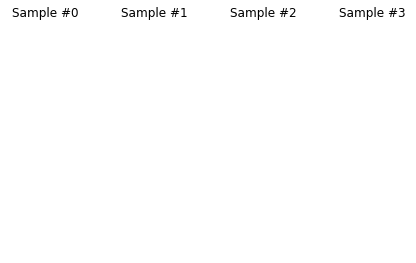

In [14]:
from IPython.display import Image, display
costume_dataset = CostumeDataset(root_dir='')

fig = plt.figure()

for i in range(len(costume_dataset)):
    sample = costume_dataset[i]

    
    print(i, sample['image'].shape)
    
    #newly added --just trying to display the images
    #honestly just trying to make sure I'm passing the right thing
    #display(Image(sample['image']))
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    if i == 3:
        plt.show()
        break